In [3]:
%matplotlib ipympl
from onix.models.schiff import inverse_fa_limit, axion_frequency_to_mass, axion_mass_to_frequency
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from astropy.timeseries import LombScargle
from onix.papers.axion_2024.lomb_scargle import ls_psd_to_power_spectrum
from onix.papers.axion_2024.axion_gluon_bounds import best_exp_bounds, worse_exp_bounds, narrowband_exp_bounds, model_indep_theory_bounds
from onix.papers.axion_2024.axion_gluon import S_Flambaum, S_Sushkov, S_geo_mean, E_xtl, theta_from_W_T

In [4]:
coherent_oscillation = np.load("coherent_oscillation.npz")
stochastic_fluctuation = np.load("stochastic_fluctuations.npz")

In [5]:
def plt_bounds(ax, data, **kwargs):
    masses = data["masses"]
    bound_geo_mean = data["inverse_fa_bound_geo_mean"]
    bound_Sushkov = bound_geo_mean * S_geo_mean / S_Sushkov
    bound_Flambaum = bound_geo_mean * S_geo_mean / S_Flambaum

    ax.fill_between(
        masses,
        bound_Flambaum,
        bound_Sushkov,
        alpha=0.6,
        zorder=100,
        **kwargs
    )
    ax.plot(
        np.append(np.append(masses[0], masses), masses[-1]),
        np.append(np.append(1, bound_geo_mean), 1),
        zorder=100,
        alpha=1,
        **kwargs
    )

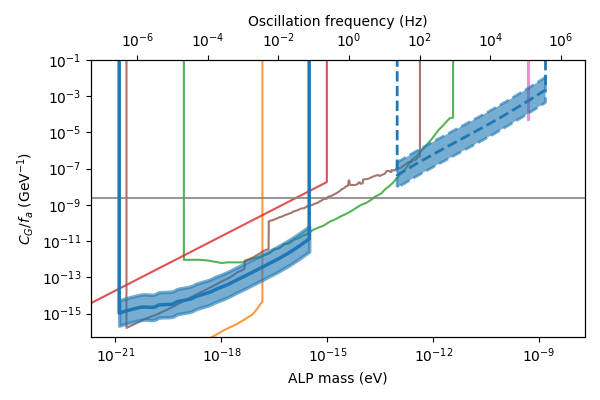

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax1 = ax.twiny()
counter = 1
for kk in best_exp_bounds:
    temp_x = best_exp_bounds[kk][0]
    temp_y = best_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1:
        counter += 1
for kk in worse_exp_bounds:
    temp_x = worse_exp_bounds[kk][0]
    temp_y = worse_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1 or counter == 4:
        counter += 1
for kk in narrowband_exp_bounds:
    temp_x = narrowband_exp_bounds[kk][0]
    temp_y = narrowband_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1 or counter == 4:
        counter += 1
for kk in model_indep_theory_bounds:
    temp_x = model_indep_theory_bounds[kk][0]
    temp_y = model_indep_theory_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C7")
    counter += 1
    if counter == 1:
        counter += 1
plt_bounds(ax, coherent_oscillation, color="C0", linestyle="-", linewidth=2.5)
plt_bounds(ax, stochastic_fluctuation, color="C0", linestyle="--", linewidth=2)
ax.set_ylabel("$C_G / f_a$ (GeV${}^{-1}$)")
ax.set_xlabel("ALP mass (eV)")
ax1.set_xscale("log")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.5e-16, 1e-1)
ax.set_xticks([1e-21, 1e-18, 1e-15, 1e-12, 1e-9])
lower_mass_bound = 2e-22
upper_mass_bound = 2e-8
ax.set_xlim(lower_mass_bound, upper_mass_bound)
ax1.set_xlim(axion_mass_to_frequency(lower_mass_bound), axion_mass_to_frequency(upper_mass_bound))
#ax1.set_xticks([1e-9, 1e-7, 1e-5, 1e-3, 0.1, 10, 1000])
ax1.set_xlabel("Oscillation frequency (Hz)")
#ax.legend()
plt.savefig("exclusion.pdf")
plt.tight_layout()
plt.show()